# Economic infrastructure intersections



## Table content: 

### 1) Set-up - importing libraries and specifying data folder

In [2]:
import os
import sys
import geopandas
import pandas
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
data_folder = "/Users/lena/OneDrive - OnTheHub - The University of Oxford/University/Oxford/OX_2018_2019/stlucia/analysis/python/projects/nismod-int-hack/data/Hackathon/rv"

## Loading in all hazards and all economic sectors as shapefiles

In [4]:
def load_hazard(data_folder, hazard_id):  
    hazard_path = os.path.join(
        data_folder, 'data', 'hazards', '{}.shp'.format(hazard_id))
    hazards = geopandas.read_file(hazard_path)
    
    if hazards.crs != {'init':'epsg:2006'}:
        hazards = hazards.to_crs({'init':'epsg:2006'})
    return hazards

In [5]:
def load_sector(data_folder, sector_id):  
    sector_path = os.path.join(
        data_folder, 'data', 'infrastructure', '{}.shp'.format(sector_id))
    sectors = geopandas.read_file(sector_path)
    
    if sectors.crs != {'init':'epsg:2006'}:
        sectors = sectors.to_crs({'init':'epsg:2006'})
    return sectors

## Loading in merged economic infrastructures as csv and admin

In [6]:
#INPUT FILE
administrative_path = os.path.join(
    data_folder, 'data','admin', 'stluc_administrative.shp')

administrative = geopandas.read_file(administrative_path)

#OUTPUT FILE
econ_merged_path= os.path.join(
    data_folder, 'data', 'infrastructure', 'econ_merged_admin.csv')

intersections_econ_path = os.path.join(
    data_folder, 'results', 'intersections_econ_merged.csv')

econ_haz_cap_path = os.path.join(
    data_folder, 'results', 'econ_hazards_capacity.csv')

econ_haz_percent_exp_path = os.path.join(
    data_folder, 'results','econ_hazards_sector%_exp.csv')

econ_haz_count_path = os.path.join(
    data_folder, 'results','econ_hazards_sector_count_exp.csv')

econ_multi_haz_asset_path = os.path.join(
    data_folder, 'results','econ_multi_hazards_assets_exp.csv')


econ_haz_abs_path = os.path.join(
    data_folder, 'results','econ_hazards_sector_abs_exp.csv')

SDG_cap_path = os.path.join(
    data_folder, 'results','econ_hazards_SDG_exp.csv')

roads_haz_percent_exp_path = os.path.join(
    data_folder, 'results', 'roads_hazards_%_exp.csv')

In [7]:
sector_ids = ['wastewater', 'waste','electricity', 'freight', 'airports', 'port', 'water']
hazard_ids = ['1m_sea-level','4m_storm-surge','flashflooding','landslide_susceptibility']

In [8]:
#  Adding multihazard computation
def two_multi_hazards(row):
    if row['4m_storm-surge'] > 0:
        val = row['4m_storm-surge']
    elif row['flashflooding'] > 0:
        val = row['flashflooding']
    else:
        val = 0 
    return val

def three_multi_hazards(row):
    if row['4m_storm-surge'] > 0:
        val = row['4m_storm-surge']
    elif row['flashflooding'] > 0:
        val = row['flashflooding']
    elif row['landslide_susceptibility'] > 0:
        val = row['landslide_susceptibility']
    else:
        val = 0 
    return val

### Only for plotting (without having to rerun analysis)

In [9]:
sector_exp = pandas.read_csv(econ_haz_percent_exp_path)
merged_intersections = pandas.read_csv(econ_haz_cap_path)
econ_merged = pandas.read_csv(econ_merged_path)
all_intersections = pandas.read_csv(intersections_econ_path)
roads_exp_per = pandas.read_csv(roads_haz_percent_exp_path)

In [10]:
econ_merged = geopandas.GeoDataFrame(econ_merged)

In [11]:
econ_merged

,sector,sector_id,capacity,unit,admin_name,geometry
0,wastewater,1,2.838240e+06,m3/year,Gros Islet,"POLYGON ((514999.292107204 1555845.599530844, ..."
1,waste,1,3.000000e+05,tons/year,Castries,"POLYGON ((510557.3171703482 1545733.623471231,..."
2,waste,2,2.983600e+05,tons/year,Vieux Fort,"POLYGON ((514027.2214014726 1520087.177808134,..."
3,electricity,1,5.638769e+01,GWh/year,Castries,"POLYGON ((509228.6672421257 1548778.674672907,..."
4,electricity,7,5.611112e+01,GWh/year,Castries,"POLYGON ((507129.5149248089 1544928.839784741,..."
5,electricity,2,7.480932e+01,GWh/year,Castries,"POLYGON ((511904.8142602404 1550668.308739966,..."
6,electricity,4,4.887127e+01,GWh/year,Dennery,"POLYGON ((520224.3125255589 1534850.96479963, ..."
7,electricity,6,2.348493e+01,GWh/year,Soufriere,"POLYGON ((503089.4458903835 1531546.229156021,..."
8,electricity,3,6.389396e+01,GWh/year,Gros Islet,"POLYGON ((513259.6180513696 1557195.106644745,..."
9,electricity,5,7.453388e+01,GWh/year,Vieux Fort,"POLYGON ((510656.9046940836 1520106.38774863, ..."


In [10]:
len(econ_merged)

35

In [10]:
econ_merged.to_file(os.path.join(
    data_folder, 'data', 'infrastructure','econ_merged.shp'))

AttributeError: 'str' object has no attribute '__geo_interface__'

## Merge all economic assets, add administrative area to each sector 

In [31]:
def intersect_sector_with_admin(sectors, administrative, sector_id):
    """Intersect sectors with administrative
    """    
    intersections = geopandas.sjoin(sectors, administrative, how="inner", op='intersects')
    intersections = intersections[[
        'id_left',
        'capacity',
        'unit',
        'admin_name',
        'geometry'
    ]]
    intersections = intersections.rename(columns={
        'id_left': 'sector_id'
    })

    return intersections

In [32]:
econ_merged = []
for sector_id in sector_ids:
    sector_df = load_sector(data_folder, sector_id)
    sector_intersection = intersect_sector_with_admin(sector_df, administrative, sector_id)
    econ_merged.append(sector_intersection)

econ_merged = pandas.concat(econ_merged, axis=0)
econ_merged = econ_merged.fillna(0)
econ_merged.to_csv(econ_merged_path, index=False)

econ_merged.head()

,sector_id,capacity,unit,admin_name,geometry
0,1,2.838240e+06,m3/year,Gros Islet,"POLYGON ((514999.292107204 1555845.599530844, ..."
0,1,7.946700e+04,tons/year,Castries,"POLYGON ((510557.3171703482 1545733.623471231,..."
1,2,0.000000e+00,tons/year,Vieux Fort,"POLYGON ((514027.2214014726 1520087.177808134,..."
0,1,5.638769e+01,GWh/year,Castries,"POLYGON ((509228.6672421257 1548778.674672908,..."
3,7,5.611112e+01,GWh/year,Castries,"POLYGON ((507129.5149248089 1544928.839784742,..."


# Intersections merged economics with each hazard as separate column

In [146]:
def intersect_hazard_with_sector(hazards, sectors, hazard_id, sector_id):
    """Intersect sectors with hazards
    """
    ### INTERSECTIONS WITH HAZARDS        
    intersections_sector_haz = geopandas.sjoin(sectors, hazards, how="inner", op='intersects')

    intersections_sector_haz[hazard_id] = 1

    intersections_sector_haz['sector'] = sector_id

    intersections_sector_haz = intersections_sector_haz[[
        'sector',
        'id_left', 
        hazard_id
    ]]
    
    intersections_sector_haz = intersections_sector_haz.rename(columns={
        'id_left': 'sector_id'
        
    })
    intersections_sector_haz = intersections_sector_haz.drop_duplicates(subset='sector_id', keep='first')
    intersections_sector_haz = intersections_sector_haz.fillna(0)
    return intersections_sector_haz

In [147]:
all_intersections = []
for sector_id in sector_ids:
    sector_df = load_sector(data_folder, sector_id)
    
    for hazard_id in hazard_ids:
        hazard_df = load_hazard(data_folder, hazard_id)
        sector_intersection = intersect_hazard_with_sector(hazard_df, sector_df, hazard_id, sector_id)
        all_intersections.append(sector_intersection)
        
all_intersections = pandas.concat(all_intersections, axis=0, sort=False)
all_intersections = all_intersections.fillna(0)

all_intersections.to_csv(intersections_econ_path)
all_intersections.head()


,sector,sector_id,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility
0,waste,1,0.0,0.0,0.0,1.0
0,electricity,1,0.0,1.0,0.0,0.0
0,electricity,1,0.0,0.0,1.0,0.0
1,electricity,4,0.0,0.0,0.0,1.0
2,electricity,6,0.0,0.0,0.0,1.0


# Point intersections for mapping

In [43]:
sector_ids = ['wastewater_point', 'waste_point','electricity_point', 'freight', 'airports', 'port', 'water_point']

In [44]:
econ_merged = []
for sector_id in sector_ids:
    sector_df = load_sector(data_folder, sector_id)
    econ_merged.append(sector_df)

econ_merged = pandas.concat(econ_merged, axis=0)
econ_merged = econ_merged.fillna(0)
econ_merged = geopandas.GeoDataFrame(econ_merged)
econ_merged.to_file(os.path.join(data_folder,'results','econ_points_merge.shp'), index=False)

econ_merged.head()

/Users/lena/miniconda3/envs/nismod_int/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,capacity,geometry,id,layer,name,path,type,unit
0,2.838240e+06,POINT (515260.7204430332 1555773.016295623),1,0,beausejour,0,0,m3/year
0,3.000000e+05,POINT (510669.5456097171 1545595.034197029),1,0,Deglos,0,0,tons/year
1,2.983600e+05,POINT (514062.2762822591 1519960.929786083),2,0,Vieux_fort,0,0,tons/year
0,5.638769e+01,POINT (509240.7220574481 1548760.871469025),1,0,castries,0,substation,GWh/year
1,4.887127e+01,POINT (520270.9007346857 1534861.353690002),4,0,prasline,0,substation,GWh/year


In [45]:
for hazard_id in hazard_ids:
    hazard_df = load_hazard(data_folder, hazard_id)
    print(hazard_df)
    sector_intersection = geopandas.sjoin(econ_merged, hazard_df, how="inner", op='intersects')
    sector_intersection = geopandas.GeoDataFrame(all_intersections)
    sector_intersection.to_file(os.path.join(data_folder,'data','results','econ_merged_point_{}.shp'.format(hazard_id)))


        id  elevation                                           geometry
0        0          0  POLYGON ((513960.8484369325 1559718.924536677,...
1        1          1  POLYGON ((517676.475174851 1521324.000647028, ...
2        2          0  POLYGON ((513921.1223146291 1559682.98559937, ...
3        3          0  POLYGON ((520775.9107930948 1535575.979606579,...
4        4          1  POLYGON ((504712.2027580385 1520471.755477475,...
...    ...        ...                                                ...
3470  3470          0  POLYGON ((521305.2788649958 1532314.020539279,...
3471  3471          0  POLYGON ((517521.145317535 1556414.49932087, 5...
3472  3472          0  POLYGON ((499603.8596082596 1532216.20506565, ...
3473  3473          0  POLYGON ((520744.0103921712 1529583.372163905,...
3474  3474          0  POLYGON ((520835.7017037242 1539852.225847942,...

[3475 rows x 3 columns]


/Users/lena/miniconda3/envs/nismod_int/lib/python3.7/site-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:2006'})
  '(%s != %s)' % (left_df.crs, right_df.crs))


AttributeError: No geometry data set yet (expected in column 'geometry'.

### Overview of all economic assets and whether they are exposed

In [12]:
#import to not rerun all analyses
all_intersections = pandas.read_csv(intersections_econ_path)

In [13]:
all_intersections.head()

,Unnamed: 0,sector,sector_id,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility,Unnamed: 7
0,0.0,waste,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,electricity,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,electricity,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,electricity,4.0,0.0,0.0,0.0,1.0,1.0
4,2.0,electricity,6.0,0.0,0.0,0.0,1.0,1.0


In [14]:
all_intersections = all_intersections.drop(columns= ['Unnamed: 0','Unnamed: 7'])

In [15]:
econ_merged.head()

,sector,sector_id,capacity,unit,admin_name,geometry
0,wastewater,1,2.838240e+06,m3/year,Gros Islet,"POLYGON ((514999.292107204 1555845.599530844, ..."
1,waste,1,3.000000e+05,tons/year,Castries,"POLYGON ((510557.3171703482 1545733.623471231,..."
2,waste,2,2.983600e+05,tons/year,Vieux Fort,"POLYGON ((514027.2214014726 1520087.177808134,..."
3,electricity,1,5.638769e+01,GWh/year,Castries,"POLYGON ((509228.6672421257 1548778.674672907,..."
4,electricity,7,5.611112e+01,GWh/year,Castries,"POLYGON ((507129.5149248089 1544928.839784741,..."


In [16]:
merged_intersections = pandas.merge(
    econ_merged, all_intersections, how = 'outer', on=['sector','sector_id']) 
merged_intersections = merged_intersections.fillna(0)
merged_intersections.head()


,sector,sector_id,capacity,unit,admin_name,geometry,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility
0,wastewater,1.0,2.838240e+06,m3/year,Gros Islet,"POLYGON ((514999.292107204 1555845.599530844, ...",0.0,0.0,0.0,0.0
1,waste,1.0,3.000000e+05,tons/year,Castries,"POLYGON ((510557.3171703482 1545733.623471231,...",0.0,0.0,0.0,1.0
2,waste,2.0,2.983600e+05,tons/year,Vieux Fort,"POLYGON ((514027.2214014726 1520087.177808134,...",0.0,0.0,0.0,0.0
3,electricity,1.0,5.638769e+01,GWh/year,Castries,"POLYGON ((509228.6672421257 1548778.674672907,...",0.0,1.0,0.0,0.0
4,electricity,1.0,5.638769e+01,GWh/year,Castries,"POLYGON ((509228.6672421257 1548778.674672907,...",0.0,0.0,1.0,0.0


In [17]:
merged_intersections.to_csv(econ_haz_count_path, index=False)

#### Add capacity to each hazard

In [18]:
merged_intersections

,sector,sector_id,capacity,unit,admin_name,geometry,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility
0,wastewater,1.0,2.838240e+06,m3/year,Gros Islet,"POLYGON ((514999.292107204 1555845.599530844, ...",0.0,0.0,0.0,0.0
1,waste,1.0,3.000000e+05,tons/year,Castries,"POLYGON ((510557.3171703482 1545733.623471231,...",0.0,0.0,0.0,1.0
2,waste,2.0,2.983600e+05,tons/year,Vieux Fort,"POLYGON ((514027.2214014726 1520087.177808134,...",0.0,0.0,0.0,0.0
3,electricity,1.0,5.638769e+01,GWh/year,Castries,"POLYGON ((509228.6672421257 1548778.674672907,...",0.0,1.0,0.0,0.0
4,electricity,1.0,5.638769e+01,GWh/year,Castries,"POLYGON ((509228.6672421257 1548778.674672907,...",0.0,0.0,1.0,0.0
5,electricity,7.0,5.611112e+01,GWh/year,Castries,"POLYGON ((507129.5149248089 1544928.839784741,...",0.0,0.0,0.0,0.0
6,electricity,2.0,7.480932e+01,GWh/year,Castries,"POLYGON ((511904.8142602404 1550668.308739966,...",0.0,0.0,0.0,0.0
7,electricity,4.0,4.887127e+01,GWh/year,Dennery,"POLYGON ((520224.3125255589 1534850.96479963, ...",0.0,0.0,0.0,1.0
8,electricity,6.0,2.348493e+01,GWh/year,Soufriere,"POLYGON ((503089.4458903835 1531546.229156021,...",0.0,0.0,0.0,1.0
9,electricity,3.0,6.389396e+01,GWh/year,Gros Islet,"POLYGON ((513259.6180513696 1557195.106644745,...",0.0,0.0,0.0,0.0


In [83]:
hazard_ids =['1m_sea-level', '4m_storm-surge', 'flashflooding', 'landslide_susceptibility']
for hazard_id in hazard_ids:
    merged_intersections[hazard_id] = merged_intersections[hazard_id]* merged_intersections['capacity']

merged_intersections.to_csv(econ_haz_cap_path, index=False)
merged_intersections.head()


,sector,sector_id,capacity,unit,admin_name,geometry,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility
0,wastewater,1,2.838240e+06,m3/year,Gros Islet,"POLYGON ((514999.292107204 1555845.599530844, ...",0.0,0.000000,0.000000,0.0
1,waste,1,3.000000e+05,tons/year,Castries,"POLYGON ((510557.3171703482 1545733.623471231,...",0.0,0.000000,0.000000,300000.0
2,waste,2,2.983600e+05,tons/year,Vieux Fort,"POLYGON ((514027.2214014726 1520087.177808134,...",0.0,0.000000,0.000000,0.0
3,electricity,1,5.638769e+01,GWh/year,Castries,"POLYGON ((509228.6672421257 1548778.674672907,...",0.0,56.387692,0.000000,0.0
4,electricity,1,5.638769e+01,GWh/year,Castries,"POLYGON ((509228.6672421257 1548778.674672907,...",0.0,0.000000,56.387692,0.0


#### Add multiple hazard calculation

In [19]:
merged_intersections = pandas.read_csv(econ_haz_cap_path)

In [20]:
list =['1m_sea-level', '4m_storm-surge', 'flashflooding', 'landslide_susceptibility', 'capacity']
#ensure all values are numeric
merged_intersections[list] = merged_intersections[list].apply(pandas.to_numeric)

In [21]:
# Merge information for each asset - grouping by 
# -> If sector_id is the same, add the columns for each of the hazards
merged_intersections = merged_intersections.groupby([
    'sector', 'sector_id', 'admin_name', 'unit', 'geometry'
    ])[
    list
    ].sum()
merged_intersections

1m_sea-level  \
sector      sector_id admin_name   unit      geometry                                                           
airports    1         Castries     pax/year  POINT (508600.6466413473 1549736.308422939)                  0.0   
            2         Vieux Fort   pax/year  POINT (513589.9350288286 1518451.421776151)                  0.0   
electricity 1         Castries     GWh/year  POLYGON ((509228.6672421257 1548778.674672907, ...           0.0   
            2         Castries     GWh/year  POLYGON ((511904.8142602404 1550668.308739966, ...           0.0   
            3         Gros Islet   GWh/year  POLYGON ((513259.6180513696 1557195.106644745, ...           0.0   
            4         Dennery      GWh/year  POLYGON ((520224.3125255589 1534850.96479963, 5...           0.0   
            5         Vieux Fort   GWh/year  POLYGON ((510656.9046940836 1520106.38774863, 5...           0.0   
            6         Soufriere    GWh/year  POLYGON ((503089.4458903835 1531546.229156021, ...           0.0   
            7         Castries     GWh/year  POLYGON ((507129.5149248089 1544928.839784741, ...           0.0   
freight     1         Castries     tons/year POINT (506573.8512454309 1545543.328356664)                  0.0   
                                             POINT (508600.6466413473 1549736.308422939)               1079.0   
            2         Castries     tons/year POINT (508841.7524133509 1548620.440771879)                  0.0   
                      Vieux Fort   tons/year POINT (513589.9350288286 1518451.421776151)                  0.0   
            3         Vieux Fort   tons/year POINT (513406.0918776742 1516817.930170817)                  0.0   
port        1         Soufriere    pax/year  POINT (501649.6425799999 1531397.389003689)              10917.0   
            2         Castries     pax/year  POINT (505470.038882971 1543639.722941131)                   0.0   
            3         Gros Islet   pax/year  POINT (513556.1237115838 1555880.73833138)               51661.0   
            4         Castries     pax/year  POINT (508487.628310719 1548563.178151027)                   0.0   
            5         Castries     pax/year  POINT (508553.5556702516 1549096.24794382)                   0.0   
            6         Castries     pax/year  POINT (508991.6900653169 1548736.472924656)             381637.0   
waste       1         Castries     tons/year POLYGON ((510557.3171703482 1545733.623471231, ...           0.0   
            2         Vieux Fort   tons/year POLYGON ((514027.2214014726 1520087.177808134, ...           0.0   
wastewater  1         Gros Islet   m3/year   POLYGON ((514999.292107204 1555845.599530844, 5...           0.0   
water       1         Castries     m3/year   POLYGON ((507492.5589582677 1546880.583106708, ...           0.0   
            2         Vieux Fort   m3/year   POLYGON ((510973.9967523385 1523681.887441577, ...           0.0   
            3         Castries     m3/year   POLYGON ((513363.5442087151 1547261.758966895, ...           0.0   
            4         Dennery      m3/year   POLYGON ((515127.8699414519 1542630.10890052, 5...           0.0   
            5         Micoud       m3/year   POLYGON ((518770.9562973584 1527844.725990789, ...           0.0   
            6         Dennery      m3/year   POLYGON ((518120.025721601 1542101.698669518, 5...           0.0   
            7         Anse-la-Raye m3/year   POLYGON ((505444.2599057879 1539340.853951953, ...           0.0   
            8         Vieux Fort   m3/year   POLYGON ((512437.8986835297 1519914.687996594, ...           0.0   
            9         Dennery      m3/year   POLYGON ((518112.2015145478 1542119.447395461, ...           0.0   
            10        Dennery      m3/year   POLYGON ((519430.4577774903 1538447.091931641, ...           0.0   
            11        Canaries     m3/year   POLYGON ((502428.4455821153 1536288.845249842, ...           0.0   
            12        Choiseu

In [22]:
#create a new hazard with combined hazard 
merged_intersections['storm_flash'] = merged_intersections.apply(two_multi_hazards, axis=1)
merged_intersections['storm_flash_landslide']= merged_intersections.apply(three_multi_hazards, axis=1)

In [23]:
merged_intersections

1m_sea-level  \
sector      sector_id admin_name   unit      geometry                                                           
airports    1         Castries     pax/year  POINT (508600.6466413473 1549736.308422939)                  0.0   
            2         Vieux Fort   pax/year  POINT (513589.9350288286 1518451.421776151)                  0.0   
electricity 1         Castries     GWh/year  POLYGON ((509228.6672421257 1548778.674672907, ...           0.0   
            2         Castries     GWh/year  POLYGON ((511904.8142602404 1550668.308739966, ...           0.0   
            3         Gros Islet   GWh/year  POLYGON ((513259.6180513696 1557195.106644745, ...           0.0   
            4         Dennery      GWh/year  POLYGON ((520224.3125255589 1534850.96479963, 5...           0.0   
            5         Vieux Fort   GWh/year  POLYGON ((510656.9046940836 1520106.38774863, 5...           0.0   
            6         Soufriere    GWh/year  POLYGON ((503089.4458903835 1531546.229156021, ...           0.0   
            7         Castries     GWh/year  POLYGON ((507129.5149248089 1544928.839784741, ...           0.0   
freight     1         Castries     tons/year POINT (506573.8512454309 1545543.328356664)                  0.0   
                                             POINT (508600.6466413473 1549736.308422939)               1079.0   
            2         Castries     tons/year POINT (508841.7524133509 1548620.440771879)                  0.0   
                      Vieux Fort   tons/year POINT (513589.9350288286 1518451.421776151)                  0.0   
            3         Vieux Fort   tons/year POINT (513406.0918776742 1516817.930170817)                  0.0   
port        1         Soufriere    pax/year  POINT (501649.6425799999 1531397.389003689)              10917.0   
            2         Castries     pax/year  POINT (505470.038882971 1543639.722941131)                   0.0   
            3         Gros Islet   pax/year  POINT (513556.1237115838 1555880.73833138)               51661.0   
            4         Castries     pax/year  POINT (508487.628310719 1548563.178151027)                   0.0   
            5         Castries     pax/year  POINT (508553.5556702516 1549096.24794382)                   0.0   
            6         Castries     pax/year  POINT (508991.6900653169 1548736.472924656)             381637.0   
waste       1         Castries     tons/year POLYGON ((510557.3171703482 1545733.623471231, ...           0.0   
            2         Vieux Fort   tons/year POLYGON ((514027.2214014726 1520087.177808134, ...           0.0   
wastewater  1         Gros Islet   m3/year   POLYGON ((514999.292107204 1555845.599530844, 5...           0.0   
water       1         Castries     m3/year   POLYGON ((507492.5589582677 1546880.583106708, ...           0.0   
            2         Vieux Fort   m3/year   POLYGON ((510973.9967523385 1523681.887441577, ...           0.0   
            3         Castries     m3/year   POLYGON ((513363.5442087151 1547261.758966895, ...           0.0   
            4         Dennery      m3/year   POLYGON ((515127.8699414519 1542630.10890052, 5...           0.0   
            5         Micoud       m3/year   POLYGON ((518770.9562973584 1527844.725990789, ...           0.0   
            6         Dennery      m3/year   POLYGON ((518120.025721601 1542101.698669518, 5...           0.0   
            7         Anse-la-Raye m3/year   POLYGON ((505444.2599057879 1539340.853951953, ...           0.0   
            8         Vieux Fort   m3/year   POLYGON ((512437.8986835297 1519914.687996594, ...           0.0   
            9         Dennery      m3/year   POLYGON ((518112.2015145478 1542119.447395461, ...           0.0   
            10        Dennery      m3/year   POLYGON ((519430.4577774903 1538447.091931641, ...           0.0   
            11        Canaries     m3/year   POLYGON ((502428.4455821153 1536288.845249842, ...           0.0   
            12        Choiseu

In [24]:
merged_intersections.to_csv(econ_multi_haz_asset_path)



### Calculate absolute exposed capacity per sector

In [25]:
list =['1m_sea-level', '4m_storm-surge', 'flashflooding', 'landslide_susceptibility','storm_flash','storm_flash_landslide', 'capacity']
sector_exp = merged_intersections.groupby(['sector', 'unit'])[list].sum().reset_index()
sector_exp

,sector,unit,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility,storm_flash,storm_flash_landslide,capacity
0,airports,pax/year,0.0,96596.000000,0.000000,0.000000e+00,96596.000000,9.659600e+04,4.561230e+05
1,electricity,GWh/year,0.0,56.387692,56.387692,7.235620e+01,56.387692,1.287439e+02,4.544799e+02
2,freight,tons/year,1079.0,770225.000000,577854.000000,0.000000e+00,770225.000000,7.702250e+05,1.349158e+06
3,port,pax/year,444215.0,904743.000000,381637.000000,0.000000e+00,904743.000000,9.047430e+05,1.742265e+06
4,waste,tons/year,0.0,0.000000,0.000000,3.000000e+05,0.000000,3.000000e+05,5.983600e+05
5,wastewater,m3/year,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.838240e+06
6,water,m3/year,0.0,0.000000,663729.000000,1.530394e+07,663729.000000,1.546987e+07,2.162927e+07


In [26]:
sector_exp.to_csv(econ_haz_abs_path)

### Calculate % of exposed capacity per sector

In [27]:
sector_exp_per = sector_exp.copy()
hazard_ids =['1m_sea-level', '4m_storm-surge', 'flashflooding', 'landslide_susceptibility', 'storm_flash', 'storm_flash_landslide']
for hazard_id in hazard_ids:
    sector_exp_per[hazard_id] = round((sector_exp_per[hazard_id] / sector_exp_per['capacity']*100))
    
sector_exp_per = sector_exp_per.fillna(0)




In [28]:
sector_exp_per.index = sector_exp_per.sector
#sector_exp_per = sector_exp_per.drop('sector', axis=1)

sector_exp_per.to_csv(econ_haz_percent_exp_path)
sector_exp_per.head()

,sector,unit,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility,storm_flash,storm_flash_landslide,capacity
sector,,,,,,,,,
airports,airports,pax/year,0.0,21.0,0.0,0.0,21.0,21.0,4.561230e+05
electricity,electricity,GWh/year,0.0,12.0,12.0,16.0,12.0,28.0,4.544799e+02
freight,freight,tons/year,0.0,57.0,43.0,0.0,57.0,57.0,1.349158e+06
port,port,pax/year,25.0,52.0,22.0,0.0,52.0,52.0,1.742265e+06
waste,waste,tons/year,0.0,0.0,0.0,50.0,0.0,50.0,5.983600e+05


## ADD ROADS 

In [29]:
#add roads as sector 
sector_exp_per = pandas.read_csv(econ_haz_percent_exp_path, index_col = 'sector')
roads_exp_per = pandas.read_csv(roads_haz_percent_exp_path, index_col = 'sector')
sector_exp_per = pandas.concat([sector_exp_per,roads_exp_per], axis=0,  sort=True)



In [30]:
roads_exp_per

,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility,capacity,unit
sector,,,,,,
roads,1.0,3.0,4.0,3.0,2.615941e+06,km


In [31]:
sector_exp_per

,1m_sea-level,4m_storm-surge,capacity,flashflooding,landslide_susceptibility,sector.1,storm_flash,storm_flash_landslide,unit
sector,,,,,,,,,
airports,0.0,21.0,4.561230e+05,0.0,0.0,airports,21.0,21.0,pax/year
electricity,0.0,12.0,4.544799e+02,12.0,16.0,electricity,12.0,28.0,GWh/year
freight,0.0,57.0,1.349158e+06,43.0,0.0,freight,57.0,57.0,tons/year
port,25.0,52.0,1.742265e+06,22.0,0.0,port,52.0,52.0,pax/year
waste,0.0,0.0,5.983600e+05,0.0,50.0,waste,0.0,50.0,tons/year
wastewater,0.0,0.0,2.838240e+06,0.0,0.0,wastewater,0.0,0.0,m3/year
water,0.0,0.0,2.162927e+07,3.0,71.0,water,3.0,72.0,m3/year
roads,1.0,3.0,2.615941e+06,4.0,3.0,NaN,NaN,NaN,km


In [136]:
sector_exp_per= sector_exp_per.replace('cargo','freight')
sector_exp_per 

,1m_sea-level,4m_storm-surge,capacity,flashflooding,landslide_susceptibility,sector.1,storm_flash,storm_flash_landslide,unit
sector,,,,,,,,,
airports,0.0,21.0,4.561230e+05,0.0,0.0,airports,21.0,21.0,pax/year
electricity,0.0,12.0,4.544799e+02,12.0,16.0,electricity,12.0,28.0,GWh/year
freight,0.0,57.0,1.349158e+06,43.0,0.0,freight,57.0,57.0,tons/year
port,25.0,52.0,1.742265e+06,22.0,0.0,port,52.0,52.0,pax/year
waste,0.0,0.0,5.983600e+05,0.0,50.0,waste,0.0,50.0,tons/year
wastewater,0.0,0.0,2.838240e+06,0.0,0.0,wastewater,0.0,0.0,m3/year
water,0.0,0.0,2.162927e+07,3.0,71.0,water,3.0,72.0,m3/year
roads,1.0,3.0,2.615941e+06,4.0,3.0,NaN,NaN,NaN,km


In [32]:
sector_exp_per = sector_exp_per.drop(columns='sector.1')

In [33]:
sector_exp_per = sector_exp_per.fillna(0)

In [34]:
sector_exp_per.to_csv(econ_haz_percent_exp_path)

# Add SDG part


In [35]:
SDG_direct_path = os.path.join(
        data_folder, 'data', 'SDG', 'SDG_influence_eco_soc_ecosystem_direct.csv')

SDG_direct = pandas.read_csv(SDG_direct_path, index_col ='Target')
SDG_direct.head()

,Goal,electricity,roads,airports,freight,port,water,wastewater,waste,healthcare,...,finance,agriculture,rangeland,forest,water ecosystem,wetlands,barren,manufacturing,wholesale,retail
Target,,,,,,,,,,,,,,,,,,,,,
1.1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1.2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,1,0,0,0,0,0,0,0,0,0
1.4,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,1,1,1,1,1,1,1,0,1,1
1.5,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,1,1,1,1,1,1,0,0


In [36]:
SDG_direct = SDG_direct.sum()
SDG_direct_sec = pandas.DataFrame(SDG_direct)
SDG_direct_sec = SDG_direct_sec.rename(columns ={
    0:'SDG_direct'
})
SDG_direct_sec.index.name='sector'
SDG_direct_sec

,SDG_direct
sector,
Goal,1640.0
electricity,9.0
roads,5.0
airports,3.0
freight,2.0
port,3.0
water,6.0
wastewater,5.0
waste,7.0


In [37]:
SDG_exp = sector_exp_per.merge(SDG_direct_sec, on ='sector' )
SDG_exp

,1m_sea-level,4m_storm-surge,capacity,flashflooding,landslide_susceptibility,storm_flash,storm_flash_landslide,unit,SDG_direct
sector,,,,,,,,,
airports,0.0,21.0,4.561230e+05,0.0,0.0,21.0,21.0,pax/year,3.0
electricity,0.0,12.0,4.544799e+02,12.0,16.0,12.0,28.0,GWh/year,9.0
freight,0.0,57.0,1.349158e+06,43.0,0.0,57.0,57.0,tons/year,2.0
port,25.0,52.0,1.742265e+06,22.0,0.0,52.0,52.0,pax/year,3.0
waste,0.0,0.0,5.983600e+05,0.0,50.0,0.0,50.0,tons/year,7.0
wastewater,0.0,0.0,2.838240e+06,0.0,0.0,0.0,0.0,m3/year,5.0
water,0.0,0.0,2.162927e+07,3.0,71.0,3.0,72.0,m3/year,6.0
roads,1.0,3.0,2.615941e+06,4.0,3.0,0.0,0.0,km,5.0


In [38]:
for hazard_id in hazard_ids:
    SDG_exp[hazard_id] = SDG_exp[hazard_id]* SDG_exp['SDG_direct']

SDG_exp.to_csv(SDG_cap_path, index=True)
SDG_exp

,1m_sea-level,4m_storm-surge,capacity,flashflooding,landslide_susceptibility,storm_flash,storm_flash_landslide,unit,SDG_direct
sector,,,,,,,,,
airports,0.0,63.0,4.561230e+05,0.0,0.0,63.0,63.0,pax/year,3.0
electricity,0.0,108.0,4.544799e+02,108.0,144.0,108.0,252.0,GWh/year,9.0
freight,0.0,114.0,1.349158e+06,86.0,0.0,114.0,114.0,tons/year,2.0
port,75.0,156.0,1.742265e+06,66.0,0.0,156.0,156.0,pax/year,3.0
waste,0.0,0.0,5.983600e+05,0.0,350.0,0.0,350.0,tons/year,7.0
wastewater,0.0,0.0,2.838240e+06,0.0,0.0,0.0,0.0,m3/year,5.0
water,0.0,0.0,2.162927e+07,18.0,426.0,18.0,432.0,m3/year,6.0
roads,5.0,15.0,2.615941e+06,20.0,15.0,0.0,0.0,km,5.0


# PLOT ECONOMIC ASSETS

In [9]:
#sector_exp = pandas.read_csv(econ_haz_percent_exp_path)
plot_econ_path = os.path.join(
        data_folder, 'figures', 'fig_economic_inf_stagged_hazards.svg')

plot_econ_SDG_path = os.path.join(
        data_folder, 'figures', 'fig_economic_SDG_hazards.svg')

SDG_cap_path = os.path.join(
    data_folder, 'results','econ_hazards_SDG_exp.csv')

SDG_direct_path = os.path.join(
        data_folder, 'data', 'SDG', 'SDG_influence_eco_soc_ecosystem_direct.csv')

SDG_direct = pandas.read_csv(SDG_direct_path)

SDG_exp = pandas.read_csv(SDG_cap_path)

sector_exp = pandas.read_csv(econ_haz_percent_exp_path)

In [10]:
#FOR SDG color=['red','darkred','yellow','lightcoral','darkgoldenrod','lightblue','blue']
def plot_to_ax(ax, title, hazard):
    ax = hazard.plot(ax=ax,kind='bar',use_index=True, legend = False,color=['red','green','yellow','orange','grey','lightblue','blue', 'black'], alpha=0.4)#x=sector_exp['sector']
    #
    ax.set_ylim(0,100)
    ax.set_title(title,fontweight = 'bold')
    ax.set_ylabel('Percentage of total capacity exposed')
    #ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation = 90)
    ax.set_xlabel('economic infrastructures')

<IPython.core.display.Javascript object>


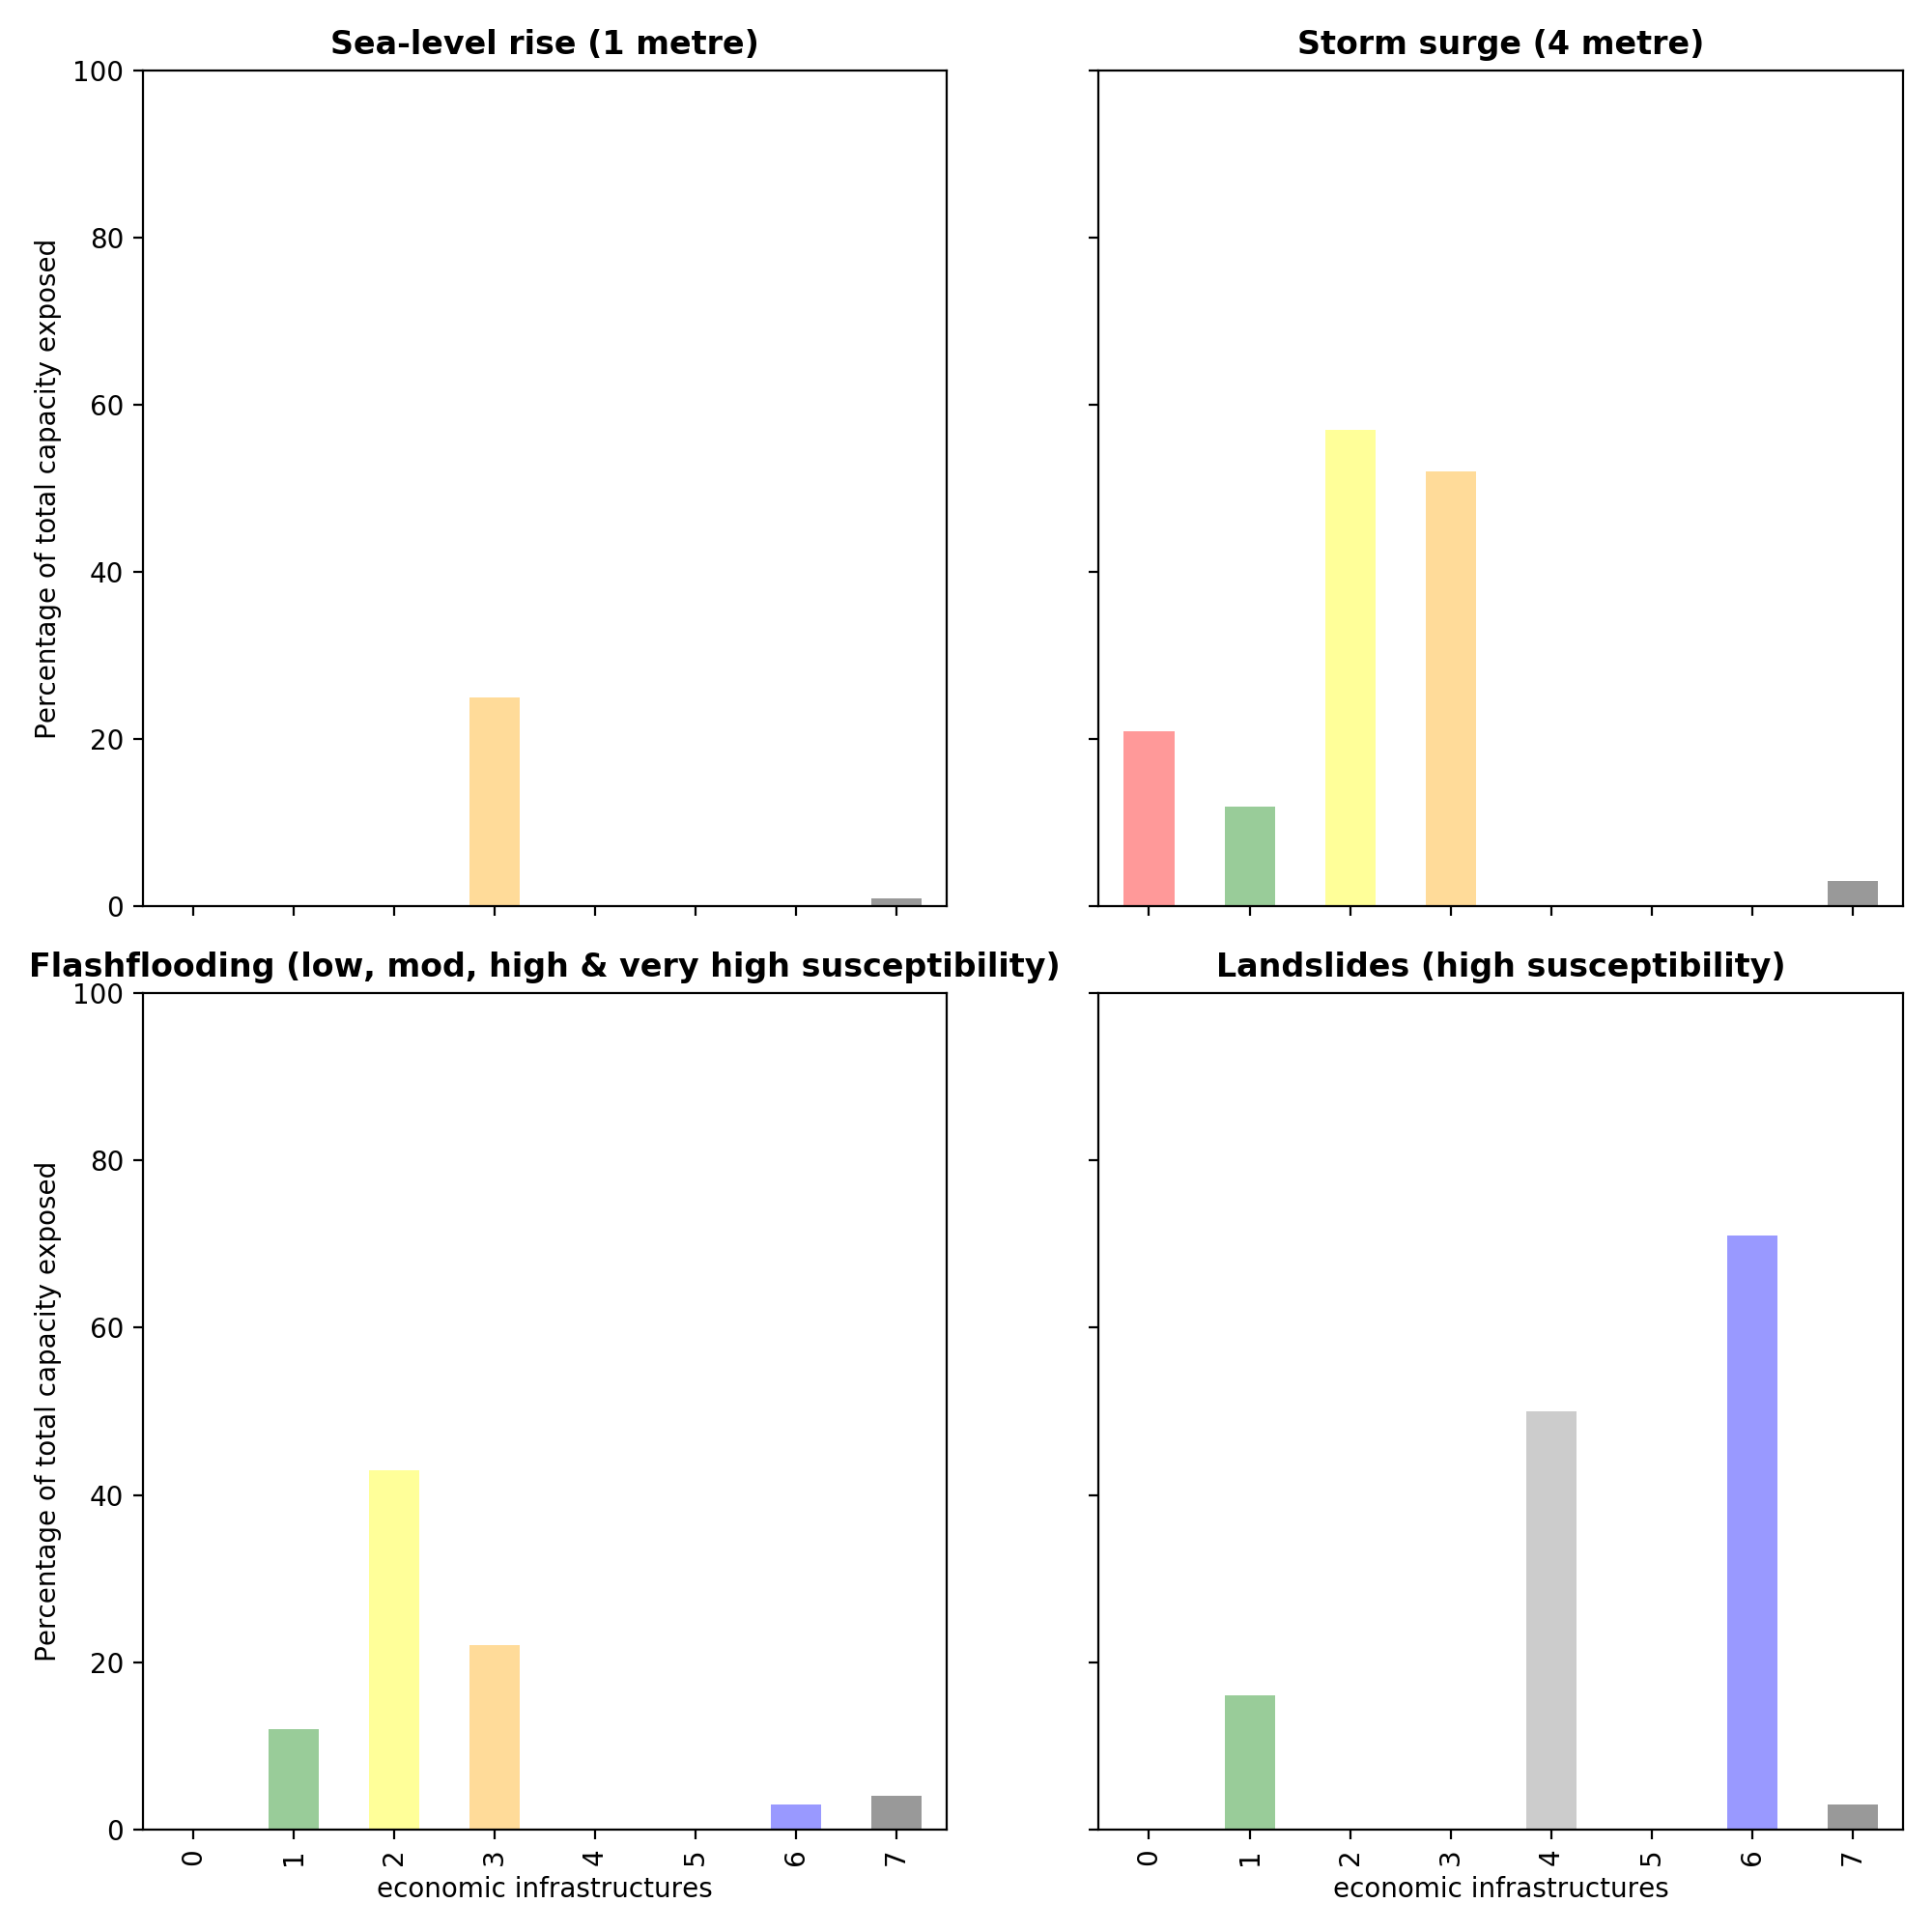

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2,sharex=True,sharey=True,figsize=(10,10), tight_layout = True)

plot_to_ax(axes[0,0], 'Sea-level rise (1 metre)', sector_exp['1m_sea-level'])
plot_to_ax(axes[0,1], 'Storm surge (4 metre)', sector_exp['4m_storm-surge'])
plot_to_ax(axes[1,0], 'Flashflooding (low, mod, high & very high susceptibility)', sector_exp['flashflooding'])
plot_to_ax(axes[1,1], 'Landslides (high susceptibility)', sector_exp['landslide_susceptibility'])
plt.savefig(plot_econ_path)
plt.show()   

In [167]:
plt.show()

<IPython.core.display.Javascript object>


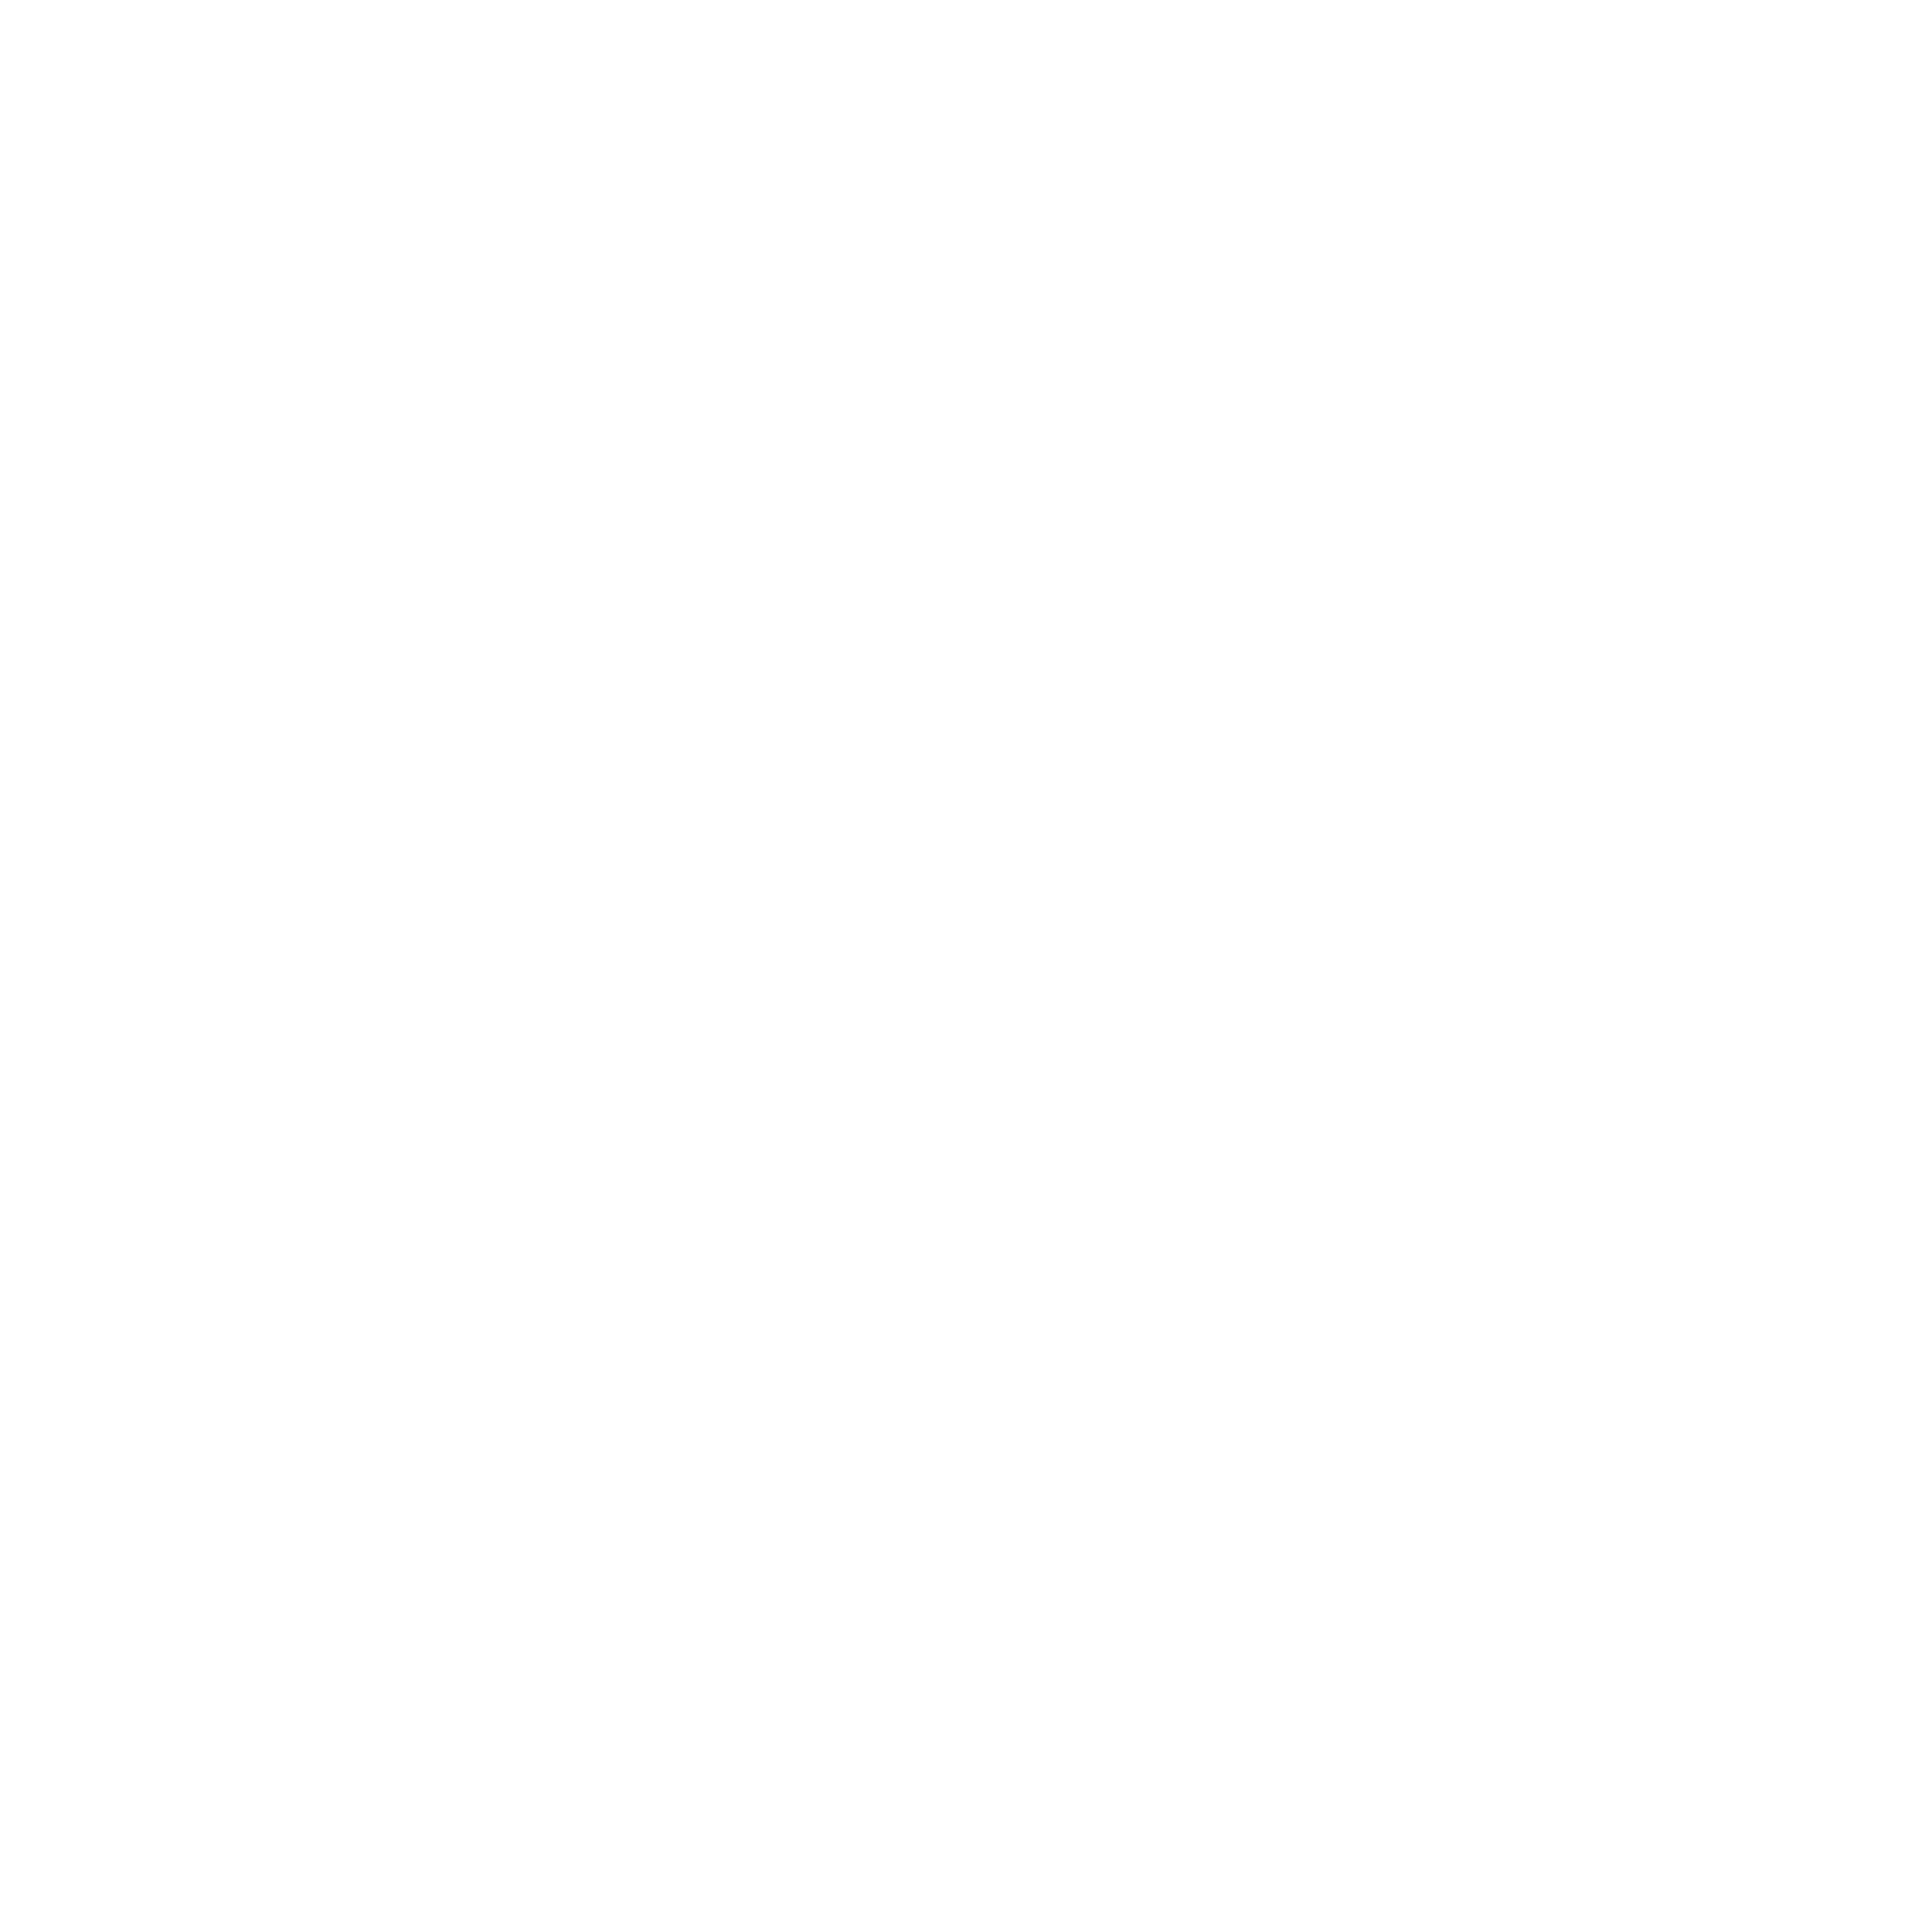

AttributeError: 'numpy.ndarray' object has no attribute 'twinx'

In [168]:
fig, ax = plt.subplots(nrows=2, ncols=2,sharex=True,sharey=True,figsize=(10,10), tight_layout = True)

plot_to_ax(ax[0,0], 'Sea-level rise (1 metre)', sector_exp['1m_sea-level'])
plot_to_ax(ax[0,1], 'Storm surge (4 metre)', sector_exp['4m_storm-surge'])
plot_to_ax(ax[1,0], 'Flashflooding (low, mod, high & very high susceptibility)', sector_exp['flashflooding'])
plot_to_ax(ax[1,1], 'Landslides (high susceptibility)', sector_exp['landslide_susceptibility'])

ax2 = ax.twinx()
plot_to_ax2(ax2[0,0], 'Sea-level rise (1 metre)', SDG_exp['1m_sea-level'])
plot_to_ax2(ax2[0,1], 'Storm surge (4 metre)', SDG_exp['4m_storm-surge'])
plot_to_ax2(ax2[1,0], 'Flashflooding (low, mod, high & very high susceptibility)', SDG_exp['flashflooding'])
plot_to_ax2(ax2[1,1], 'Landslides (high susceptibility)', SDG_exp['landslide_susceptibility'])

plt.show()
plt.savefig(plot_econ_SDG_path)

# BY ADMIN CALCULATION

### MERGE ADMIN WITH ALL ASSETS, CUMULATIVE RISK

In [40]:
admin_econ_cum_exp_path = os.path.join(
    data_folder, 'results', 'admin_econ_cum_geo.csv')

admin_econ_cum_exp_disag_path = os.path.join(
    data_folder, 'results', 'admin_econ_cum_disag.csv')

admin_econ_exp_path = os.path.join(
    data_folder, 'results','admin_econ_sector_exp.csv')

merged_intersections = pandas.read_csv(econ_multi_haz_asset_path)
admin_econ_mean_exp_path= os.path.join(
    data_folder, 'results', 'admin_econ_mean.csv')

hazard_ids = ['1m_sea-level','4m_storm-surge','flashflooding','landslide_susceptibility', 'storm_flash', 'storm_flash_landslide']

In [91]:
merged_intersections

,sector,sector_id,admin_name,unit,geometry,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility,capacity,storm_flash,storm_flash_landslide
0,airports,1,Castries,pax/year,POINT (508600.6466413473 1549736.308422939),0.0,96596.000000,0.000000,0.000000e+00,9.659600e+04,96596.000000,9.659600e+04
1,airports,2,Vieux Fort,pax/year,POINT (513589.9350288286 1518451.421776151),0.0,0.000000,0.000000,0.000000e+00,3.595270e+05,0.000000,0.000000e+00
2,electricity,1,Castries,GWh/year,"POLYGON ((509228.6672421257 1548778.674672907,...",0.0,56.387692,56.387692,0.000000e+00,1.127754e+02,56.387692,5.638769e+01
3,electricity,2,Castries,GWh/year,"POLYGON ((511904.8142602404 1550668.308739966,...",0.0,0.000000,0.000000,0.000000e+00,7.480932e+01,0.000000,0.000000e+00
4,electricity,3,Gros Islet,GWh/year,"POLYGON ((513259.6180513696 1557195.106644745,...",0.0,0.000000,0.000000,0.000000e+00,6.389396e+01,0.000000,0.000000e+00
5,electricity,4,Dennery,GWh/year,"POLYGON ((520224.3125255589 1534850.96479963, ...",0.0,0.000000,0.000000,4.887127e+01,4.887127e+01,0.000000,4.887127e+01
6,electricity,5,Vieux Fort,GWh/year,"POLYGON ((510656.9046940836 1520106.38774863, ...",0.0,0.000000,0.000000,0.000000e+00,7.453388e+01,0.000000,0.000000e+00
7,electricity,6,Soufriere,GWh/year,"POLYGON ((503089.4458903835 1531546.229156021,...",0.0,0.000000,0.000000,2.348493e+01,2.348493e+01,0.000000,2.348493e+01
8,electricity,7,Castries,GWh/year,"POLYGON ((507129.5149248089 1544928.839784741,...",0.0,0.000000,0.000000,0.000000e+00,5.611112e+01,0.000000,0.000000e+00
9,freight,1,Castries,tons/year,POINT (506573.8512454309 1545543.328356664),0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


In [ ]:
merged_intersections= merged_intersections.replace('cargo','freight')
merged_intersections

In [41]:
econ_admin = merged_intersections.groupby(['admin_name','sector', 'unit']).sum().reset_index()
econ_admin

,admin_name,sector,unit,sector_id,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility,capacity,storm_flash,storm_flash_landslide
0,Anse-la-Raye,water,m3/year,7,0.0,0.000000,165932.000000,0.000000e+00,1.659320e+05,165932.000000,1.659320e+05
1,Canaries,water,m3/year,11,0.0,0.000000,497797.000000,4.977970e+05,9.955940e+05,497797.000000,4.977970e+05
2,Castries,airports,pax/year,1,0.0,96596.000000,0.000000,0.000000e+00,9.659600e+04,96596.000000,9.659600e+04
3,Castries,electricity,GWh/year,10,0.0,56.387692,56.387692,0.000000e+00,2.436958e+02,56.387692,5.638769e+01
4,Castries,freight,tons/year,4,1079.0,576795.000000,575716.000000,0.000000e+00,1.153590e+06,576795.000000,5.767950e+05
5,Castries,port,pax/year,17,381637.0,842165.000000,381637.000000,0.000000e+00,1.617109e+06,842165.000000,8.421650e+05
6,Castries,waste,tons/year,1,0.0,0.000000,0.000000,3.000000e+05,3.000000e+05,0.000000,3.000000e+05
7,Castries,water,m3/year,4,0.0,0.000000,0.000000,1.161526e+07,1.310865e+07,0.000000,1.161526e+07
8,Choiseul,water,m3/year,12,0.0,0.000000,0.000000,0.000000e+00,7.168270e+05,0.000000,0.000000e+00
9,Dennery,electricity,GWh/year,4,0.0,0.000000,0.000000,4.887127e+01,4.887127e+01,0.000000,4.887127e+01


### Exporting overview of percentage of sector exposed with admin info

In [42]:
econ_admin_stagged = econ_admin.copy()
for hazard_id in hazard_ids:
    econ_admin_stagged[hazard_id] = round((econ_admin_stagged[hazard_id] / econ_admin_stagged.capacity)*100)
econ_admin_stagged = econ_admin_stagged.drop(columns={'unit', 'sector_id', 'capacity'})
econ_admin_stagged = econ_admin_stagged.set_index('admin_name')
econ_admin_stagged.to_csv(admin_econ_exp_path)

In [43]:
econ_admin_stagged

,sector,1m_sea-level,4m_storm-surge,flashflooding,landslide_susceptibility,storm_flash,storm_flash_landslide
admin_name,,,,,,,
Anse-la-Raye,water,0.0,0.0,100.0,0.0,100.0,100.0
Canaries,water,0.0,0.0,50.0,50.0,50.0,50.0
Castries,airports,0.0,100.0,0.0,0.0,100.0,100.0
Castries,electricity,0.0,23.0,23.0,0.0,23.0,23.0
Castries,freight,0.0,50.0,50.0,0.0,50.0,50.0
Castries,port,24.0,52.0,24.0,0.0,52.0,52.0
Castries,waste,0.0,0.0,0.0,100.0,0.0,100.0
Castries,water,0.0,0.0,0.0,89.0,0.0,89.0
Choiseul,water,0.0,0.0,0.0,0.0,0.0,0.0


### Computing sector exposure for all different administrative areas

In [88]:
def merge_admin(sector_id, administrative):
    sector = econ_admin[econ_admin['sector'] == sector_id]
    admin_econ_sector =  pandas.merge(administrative, sector, on ='admin_name', how='left')
    admin_econ_sector['sector'] = sector_id
    
    return admin_econ_sector

## Export each admin and sector

In [89]:
for sector_id in sector_ids:
    admin_econ = merge_admin(sector_id, administrative)
    admin_econ = geopandas.GeoDataFrame(admin_econ)
    admin_econ.crs = {'init': 'epsg:2006'}
    admin_econ = admin_econ.reset_index()
    for hazard_id in hazard_ids:
        admin_econ[hazard_id] = round((admin_econ[hazard_id] / admin_econ['capacity'])*100)
    admin_econ = admin_econ.rename(columns={
        '1m_sea-level': 'sea-lev_1m',
        '4m_storm-surge': 'storm_s_4m',
        'flashflooding': 'flashflood', 
        'landslide_susceptibility':'landslide'
    })
    admin_econ = admin_econ.drop(columns=[ 'sector_id', 'index', 'id'])
    admin_econ = admin_econ.fillna(0)
    print(admin_econ)
    admin_econ_path = os.path.join(
        data_folder, 'results','admin_{}.shp'.format(sector_id))
    admin_econ.to_file(admin_econ_path)

     admin_name                                           geometry  \
0  Anse-la-Raye  POLYGON ((504489.1002518567 1543070.570047858,...   
1      Canaries  POLYGON ((504962.9645831303 1534981.799464189,...   
2      Castries  POLYGON ((504489.1002518567 1543070.570047858,...   
3      Choiseul  POLYGON ((507850.020189992 1529299.173142115, ...   
4       Dennery  POLYGON ((521289.1197935755 1543615.433000766,...   
5    Gros Islet  POLYGON ((514096.4336815997 1543239.529323319,...   
6       Laborie  POLYGON ((510296.0161504431 1518209.724388601,...   
7        Micoud  (POLYGON ((519386.4274498464 1533181.09109453,...   
8     Soufriere  POLYGON ((508887.6301650093 1530098.062839435,...   
9    Vieux Fort  (POLYGON ((507850.020189992 1529299.173142115,...   

       sector     unit  sea-lev_1m  storm_s_4m  flashflood  landslide  \
0  wastewater        0         0.0         0.0         0.0        0.0   
1  wastewater        0         0.0         0.0         0.0        0.0   
2  wastewa

     admin_name                                           geometry    sector  \
0  Anse-la-Raye  POLYGON ((504489.1002518567 1543070.570047858,...  airports   
1      Canaries  POLYGON ((504962.9645831303 1534981.799464189,...  airports   
2      Castries  POLYGON ((504489.1002518567 1543070.570047858,...  airports   
3      Choiseul  POLYGON ((507850.020189992 1529299.173142115, ...  airports   
4       Dennery  POLYGON ((521289.1197935755 1543615.433000766,...  airports   
5    Gros Islet  POLYGON ((514096.4336815997 1543239.529323319,...  airports   
6       Laborie  POLYGON ((510296.0161504431 1518209.724388601,...  airports   
7        Micoud  (POLYGON ((519386.4274498464 1533181.09109453,...  airports   
8     Soufriere  POLYGON ((508887.6301650093 1530098.062839435,...  airports   
9    Vieux Fort  (POLYGON ((507850.020189992 1529299.173142115,...  airports   

       unit  sea-lev_1m  storm_s_4m  flashflood  landslide  capacity  \
0         0         0.0         0.0         0.0

### [old_v072019]Combine administrative areas for each asset 

In [ ]:
admin_econ_sector = []
for sector_id in sector_ids:
    admin_econ = merge_admin(sector_id, administrative)
    admin_econ_sector.append(admin_econ)
admin_econ_sector = pandas.concat(admin_econ_sector, axis=0)
admin_econ_sector_ind = admin_econ_sector.set_index('admin_name')
admin_econ_sector_ind

In [ ]:
for hazard_id in hazard_ids:
    admin_econ_sector[hazard_id] = round((admin_econ_sector[hazard_id] / admin_econ_sector.capacity)*100)
    #sector_exp = rename_hazard_ids(hazard_id)

In [ ]:
#sector_exp.index = sector_exp.sector
admin_econ_sector = admin_econ_sector.drop(['geometry','unit','sector_id','capacity','id'], axis=1)
admin_econ_sector_ind = admin_econ_sector.set_index('admin_name')
admin_econ_sector_ind

In [ ]:
admin_econ_sector_ind.to_csv(admin_econ_cum_exp_disag_path)

In [ ]:
admin_econ_cum_exp = admin_econ_sector.groupby(['admin_name']).sum().reset_index()

admin_econ_cum_exp

In [ ]:
admin_econ_cum_exp.to_csv(admin_econ_cum_exp_path)